# Model prep

This notebook prepares some of the data for modelling.

# Imports

## Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
%matplotlib inline

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# columns eda

In [33]:
divide_data.poverty_ratio.describe()

count    9988.000000
mean       16.683911
std         9.059927
min         1.300000
25%        10.000000
50%        15.300000
75%        21.800000
max        65.400000
Name: poverty_ratio, dtype: float64

In [34]:
divide_data.white_pct.describe()

count    9988.000000
mean       85.752473
std        16.086297
min         0.500000
25%        81.300000
50%        92.200000
75%        96.300000
max       100.000000
Name: white_pct, dtype: float64

In [88]:
divide_data.violinplot()

AttributeError: 'DataFrame' object has no attribute 'violinplot'

In [44]:
divide_data['median_income'] = abs(divide_data['median_income'])

In [51]:
divide_data.median_income

8554

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026779165C40>,
      dtype=object)

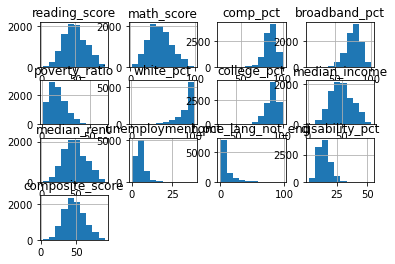

In [89]:
divide_data.hist()

In [47]:
divide_data.describe()

,reading_score,math_score,comp_pct,broadband_pct,poverty_ratio,white_pct,college_pct,median_income,median_rent,unemployment_pct,home_lang_not_eng,disability_pct,composite_score
count,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9.988000e+03,9.988000e+03,9988.000000,9988.000000,9988.000000,9988.000000
mean,49.785342,45.383260,85.306278,75.330447,16.683911,85.752473,88.112565,2.587628e+05,-4.003978e+06,5.470685,10.357099,14.944403,47.584301
std,16.486362,17.658938,6.996305,10.036105,9.059927,16.086297,7.147725,1.155179e+07,5.151800e+07,3.160376,13.767899,4.939173,14.514709
min,2.000000,2.000000,25.300000,14.600000,1.300000,0.500000,33.700000,1.946200e+04,-6.666667e+08,0.000000,0.000000,0.000000,2.500000
25%,37.000000,32.000000,81.400000,69.400000,10.000000,81.300000,84.800000,4.504725e+04,6.440000e+02,3.500000,2.400000,11.400000,37.000000
50%,49.000000,44.000000,85.900000,76.000000,15.300000,92.200000,89.700000,5.403400e+04,7.440000e+02,4.900000,5.100000,14.400000,46.500000
75%,62.000000,57.000000,90.300000,82.400000,21.800000,96.300000,93.100000,6.596250e+04,9.210000e+02,6.800000,12.000000,17.900000,57.500000
max,94.000000,98.000000,100.000000,100.000000,65.400000,100.000000,100.000000,6.666667e+08,3.439000e+03,38.300000,97.600000,65.800000,91.000000


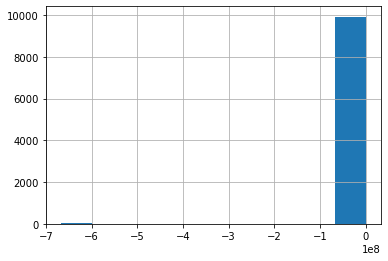

In [52]:
divide_data.median_rent.hist()

In [55]:
divide_data['median_rent'] = divide_data[divide_data['median_rent']>0]

In [84]:
divide_data.dropna(inplace=True)
divide_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9928 entries, 0102650 to 5502880
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   reading_score      9928 non-null   int64  
 1   math_score         9928 non-null   int64  
 2   comp_pct           9928 non-null   float64
 3   broadband_pct      9928 non-null   float64
 4   poverty_ratio      9928 non-null   float64
 5   white_pct          9928 non-null   float64
 6   college_pct        9928 non-null   float64
 7   median_income      9928 non-null   float64
 8   median_rent        9928 non-null   float64
 9   unemployment_pct   9928 non-null   float64
 10  home_lang_not_eng  9928 non-null   float64
 11  disability_pct     9928 non-null   float64
 12  composite_score    9928 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 1.1+ MB


In [85]:
divide_data.to_pickle('../data/divide_9928.pkl')

In [61]:
divide_data.median_rent.describe()

count    9928.000000
mean       49.782836
std        16.490773
min         2.000000
25%        37.000000
50%        49.000000
75%        62.000000
max        94.000000
Name: median_rent, dtype: float64

In [86]:
divide_data.median()

reading_score        49.0
math_score           44.0
comp_pct             85.9
broadband_pct        76.0
poverty_ratio        15.3
white_pct            92.1
college_pct          89.7
median_income        49.0
median_rent          49.0
unemployment_pct      4.9
home_lang_not_eng     5.1
disability_pct       14.4
composite_score      46.5
dtype: float64

## Data

In [62]:
divide_data = pd.read_pickle('../data/CLEANED_df.pkl')
divide_data.head()

,reading_score,math_score,comp_pct,broadband_pct,poverty_ratio,white_pct,college_pct,median_income,median_rent,unemployment_pct,home_lang_not_eng,disability_pct,composite_score
LEAID,,,,,,,,,,,,,
0102650,48,48,81.2,72.9,16.5,89.2,83.4,48161,750,7.8,3.0,18.4,48.0
0102670,17,15,55.9,46.2,49.0,29.9,78.1,23561,574,12.3,1.4,25.2,16.0
0102700,41,43,83.5,68.1,32.3,49.4,84.2,40218,825,9.2,4.9,16.6,42.0
0102730,37,29,72.9,62.8,29.4,56.0,80.6,37458,456,10.6,4.3,24.5,33.0
0102760,48,53,81.5,70.5,27.9,88.8,82.8,36306,492,7.3,1.4,23.7,50.5


In [64]:
divide_data.describe()

,reading_score,math_score,comp_pct,broadband_pct,poverty_ratio,white_pct,college_pct,median_income,median_rent,unemployment_pct,home_lang_not_eng,disability_pct,composite_score
count,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9.988000e+03,9.988000e+03,9988.000000,9988.000000,9988.000000,9988.000000
mean,49.785342,45.383260,85.306278,75.330447,16.683911,85.752473,88.112565,-1.417178e+05,-4.003978e+06,5.470685,10.357099,14.944403,47.584301
std,16.486362,17.658938,6.996305,10.036105,9.059927,16.086297,7.147725,1.155382e+07,5.151800e+07,3.160376,13.767899,4.939173,14.514709
min,2.000000,2.000000,25.300000,14.600000,1.300000,0.500000,33.700000,-6.666667e+08,-6.666667e+08,0.000000,0.000000,0.000000,2.500000
25%,37.000000,32.000000,81.400000,69.400000,10.000000,81.300000,84.800000,4.504200e+04,6.440000e+02,3.500000,2.400000,11.400000,37.000000
50%,49.000000,44.000000,85.900000,76.000000,15.300000,92.200000,89.700000,5.402200e+04,7.440000e+02,4.900000,5.100000,14.400000,46.500000
75%,62.000000,57.000000,90.300000,82.400000,21.800000,96.300000,93.100000,6.592550e+04,9.210000e+02,6.800000,12.000000,17.900000,57.500000
max,94.000000,98.000000,100.000000,100.000000,65.400000,100.000000,100.000000,2.500010e+05,3.439000e+03,38.300000,97.600000,65.800000,91.000000


In [63]:
divide_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9988 entries, 0102650 to 5502880
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   reading_score      9988 non-null   int64  
 1   math_score         9988 non-null   int64  
 2   comp_pct           9988 non-null   float64
 3   broadband_pct      9988 non-null   float64
 4   poverty_ratio      9988 non-null   float64
 5   white_pct          9988 non-null   float64
 6   college_pct        9988 non-null   float64
 7   median_income      9988 non-null   int64  
 8   median_rent        9988 non-null   int64  
 9   unemployment_pct   9988 non-null   float64
 10  home_lang_not_eng  9988 non-null   float64
 11  disability_pct     9988 non-null   float64
 12  composite_score    9988 non-null   float64
dtypes: float64(9), int64(4)
memory usage: 1.1+ MB


In [65]:
divide_data['median_income']  = divide_data[divide_data['median_income']>0]

In [66]:
divide_data['median_rent'] = divide_data[divide_data['median_rent']>0]

In [68]:
divide_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9988 entries, 0102650 to 5502880
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   reading_score      9988 non-null   int64  
 1   math_score         9988 non-null   int64  
 2   comp_pct           9988 non-null   float64
 3   broadband_pct      9988 non-null   float64
 4   poverty_ratio      9988 non-null   float64
 5   white_pct          9988 non-null   float64
 6   college_pct        9988 non-null   float64
 7   median_income      9985 non-null   float64
 8   median_rent        9928 non-null   float64
 9   unemployment_pct   9988 non-null   float64
 10  home_lang_not_eng  9988 non-null   float64
 11  disability_pct     9988 non-null   float64
 12  composite_score    9988 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 1.1+ MB


In [69]:
divide_data.dropna(inplace=True)

In [72]:
divide_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9928 entries, 0102650 to 5502880
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   reading_score      9928 non-null   int64  
 1   math_score         9928 non-null   int64  
 2   comp_pct           9928 non-null   float64
 3   broadband_pct      9928 non-null   float64
 4   poverty_ratio      9928 non-null   float64
 5   white_pct          9928 non-null   float64
 6   college_pct        9928 non-null   float64
 7   median_income      9928 non-null   float64
 8   median_rent        9928 non-null   float64
 9   unemployment_pct   9928 non-null   float64
 10  home_lang_not_eng  9928 non-null   float64
 11  disability_pct     9928 non-null   float64
 12  composite_score    9928 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 1.1+ MB


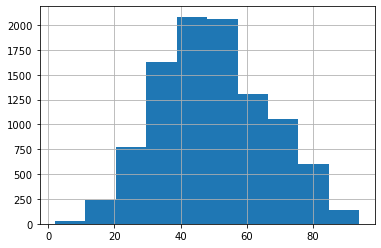

In [74]:
divide_data.median_income.hist()

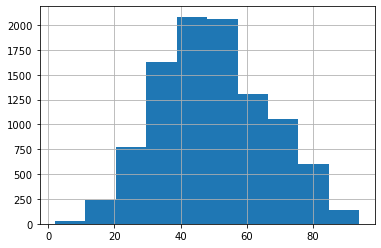

In [75]:
divide_data.median_rent.hist()

In [5]:
train_set, test_set = train_test_split(divide_data, test_size=0.2, random_state=31)

In [6]:
dd_test = test_set.copy()

In [7]:
digital_divide = train_set.copy()

In [8]:
divide_labels = digital_divide['composite_score']
divide = digital_divide.drop(['reading_score','math_score','composite_score'],axis=1)

In [9]:
divide.columns

Index(['comp_pct', 'broadband_pct', 'poverty_ratio', 'white_pct',
       'college_pct', 'median_income', 'median_rent', 'unemployment_pct',
       'home_lang_not_eng', 'disability_pct'],
      dtype='object')

In [11]:
num_pipeline = Pipeline([
    ##Eventually add imputer
    ##Eventually add feature engineering functions
    ('std_scaler', StandardScaler())
])

In [12]:
num_attribs = list(divide)
## cat_attibs = []

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs)
    ##('cat', cat_pipeline[OneHotEncoder()], cat_attribs)
])

In [13]:
divide_prepped = full_pipeline.fit_transform(divide)

# Linear Regression

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(divide_prepped, divide_labels)

LinearRegression()

In [15]:
lin_reg_predictions = lin_reg.predict(divide_prepped)
print(lin_reg_predictions)
print(divide_labels)
error = mean_squared_error(divide_labels, lin_reg_predictions)
pre_err = np.sqrt(error)
RMSE = pre_err

[51.12871257 55.34207479 43.49517234 ... 49.80034032 52.40252435
 50.0721725 ]
LEAID
2623490    32.5
3621930    59.5
1302430    39.5
5401170    37.5
4900142    45.5
           ... 
3626430    53.0
0103450    41.5
0643560    42.0
2723550    65.0
3100122    57.5
Name: composite_score, Length: 7990, dtype: float64


In [16]:
print(RMSE)

12.858917422236514


## Model Performance Evaluation

## Linear Regression Feature Importance

Feature: 0, Score: -2.64448
Feature: 1, Score: 3.61820
Feature: 2, Score: -2.02197
Feature: 3, Score: 2.16448
Feature: 4, Score: 0.99059
Feature: 5, Score: -0.20056
Feature: 6, Score: 0.04197
Feature: 7, Score: -0.81239
Feature: 8, Score: -0.35061
Feature: 9, Score: -1.95392


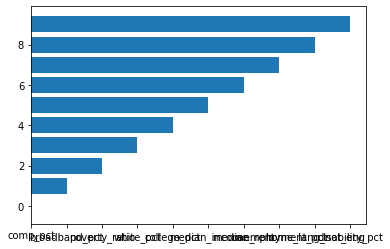

In [39]:
importance = lin_reg.coef_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.barh([x for x in range(len(importance))], divide.columns)
plt.show()

# Decision Tree Regressor

In [25]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(divide_prepped, divide_labels)

DecisionTreeRegressor()

In [26]:
dt_predictions = dt_reg.predict(divide_prepped)
print(dt_predictions)
print(divide_labels)
RMSE_dt = np.sqrt(
    mean_squared_error(divide_labels, dt_predictions))
print(RMSE_dt)

[32.5 59.5 39.5 ... 42.  65.  57.5]
LEAID
2623490    32.5
3621930    59.5
1302430    39.5
5401170    37.5
4900142    45.5
           ... 
3626430    53.0
0103450    41.5
0643560    42.0
2723550    65.0
3100122    57.5
Name: composite_score, Length: 7990, dtype: float64
0.0


## Model Performance Evaluation

## Feature Importance

In [103]:
def plot_feature_importances(model):
    n_features = divide_prepped.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), 
               divide.columns.str.replace('_', ' ', ))
    plt.xlabel('Feature Importance')
    plt.ylabel("Feature")
    

AttributeError: 'NoneType' object has no attribute 'savefig'

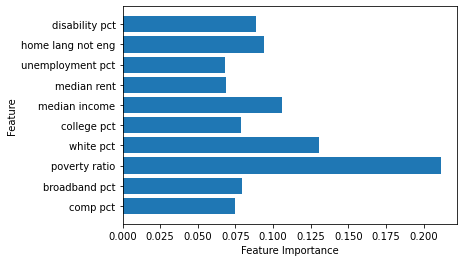

In [105]:
plot_feature_importances(dt_reg).savefig('')

In [78]:
dt_importance = dt_reg.feature_importances_
for i,v in enumerate(dt_importance):
	print('divide.columns, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(dt_importance))], divide.columns)
plt.show()

TypeError: not all arguments converted during string formatting

# Random Forest Regressor

In [80]:
rf_reg = RandomForestRegressor()
rf_reg.fit(divide_prepped, divide_labels)

RandomForestRegressor()

In [81]:
rf_predictions = rf_reg.predict(divide_prepped)
print(rf_predictions)
print(divide_labels)
RMSE_rf = np.sqrt(
    mean_squared_error(divide_labels, rf_predictions))

print(RMSE_rf)

[41.31  58.725 40.875 ... 42.68  61.15  55.78 ]
LEAID
2623490    32.5
3621930    59.5
1302430    39.5
5401170    37.5
4900142    45.5
           ... 
3626430    53.0
0103450    41.5
0643560    42.0
2723550    65.0
3100122    57.5
Name: composite_score, Length: 7990, dtype: float64
4.744000388277806


In [82]:
rf_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Feature: 0, Score: -2.64448
Feature: 1, Score: 3.61820
Feature: 2, Score: -2.02197
Feature: 3, Score: 2.16448
Feature: 4, Score: 0.99059
Feature: 5, Score: -0.20056
Feature: 6, Score: 0.04197
Feature: 7, Score: -0.81239
Feature: 8, Score: -0.35061
Feature: 9, Score: -1.95392


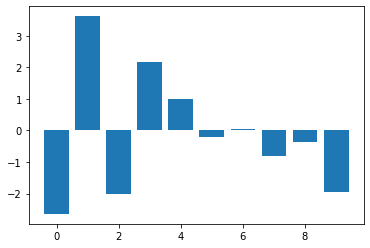

In [37]:
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

# CART Algorithm

# Model Evaluation